In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#pre-processing

In [2]:
df = pd.read_csv("/content/wine_dataset.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [5]:
df['style'] = df['style'].replace('red' , 0)
df['style'] = df['style'].replace('white' , 1)

In [6]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*50)

6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
14.0      1
14.3      1
13.8      1
13.5      1
3.9       1
Name: fixed_acidity, Length: 106, dtype: int64
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
1.010      1
1.090      1
0.905      1
0.805      1
0.355      1
Name: volatile_acidity, Length: 187, dtype: int64
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
0.88      1
1.66      1
0.99      1
1.23      1
0.86      1
Name: citric_acid, Length: 89, dtype: int64
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
5.95       1
7.45       1
65.80      1
14.05      1
18.40      1
Name: residual_sugar, Length: 316, dtype: int64
0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.387      1
0.422      1
0.222      1
0.143      1
0.212      1
Name: chlorides, Length: 214, dtype: int64
29.0    183
6.0     170
26.0    161
15.0    157
24.0    152
       ... 
19.

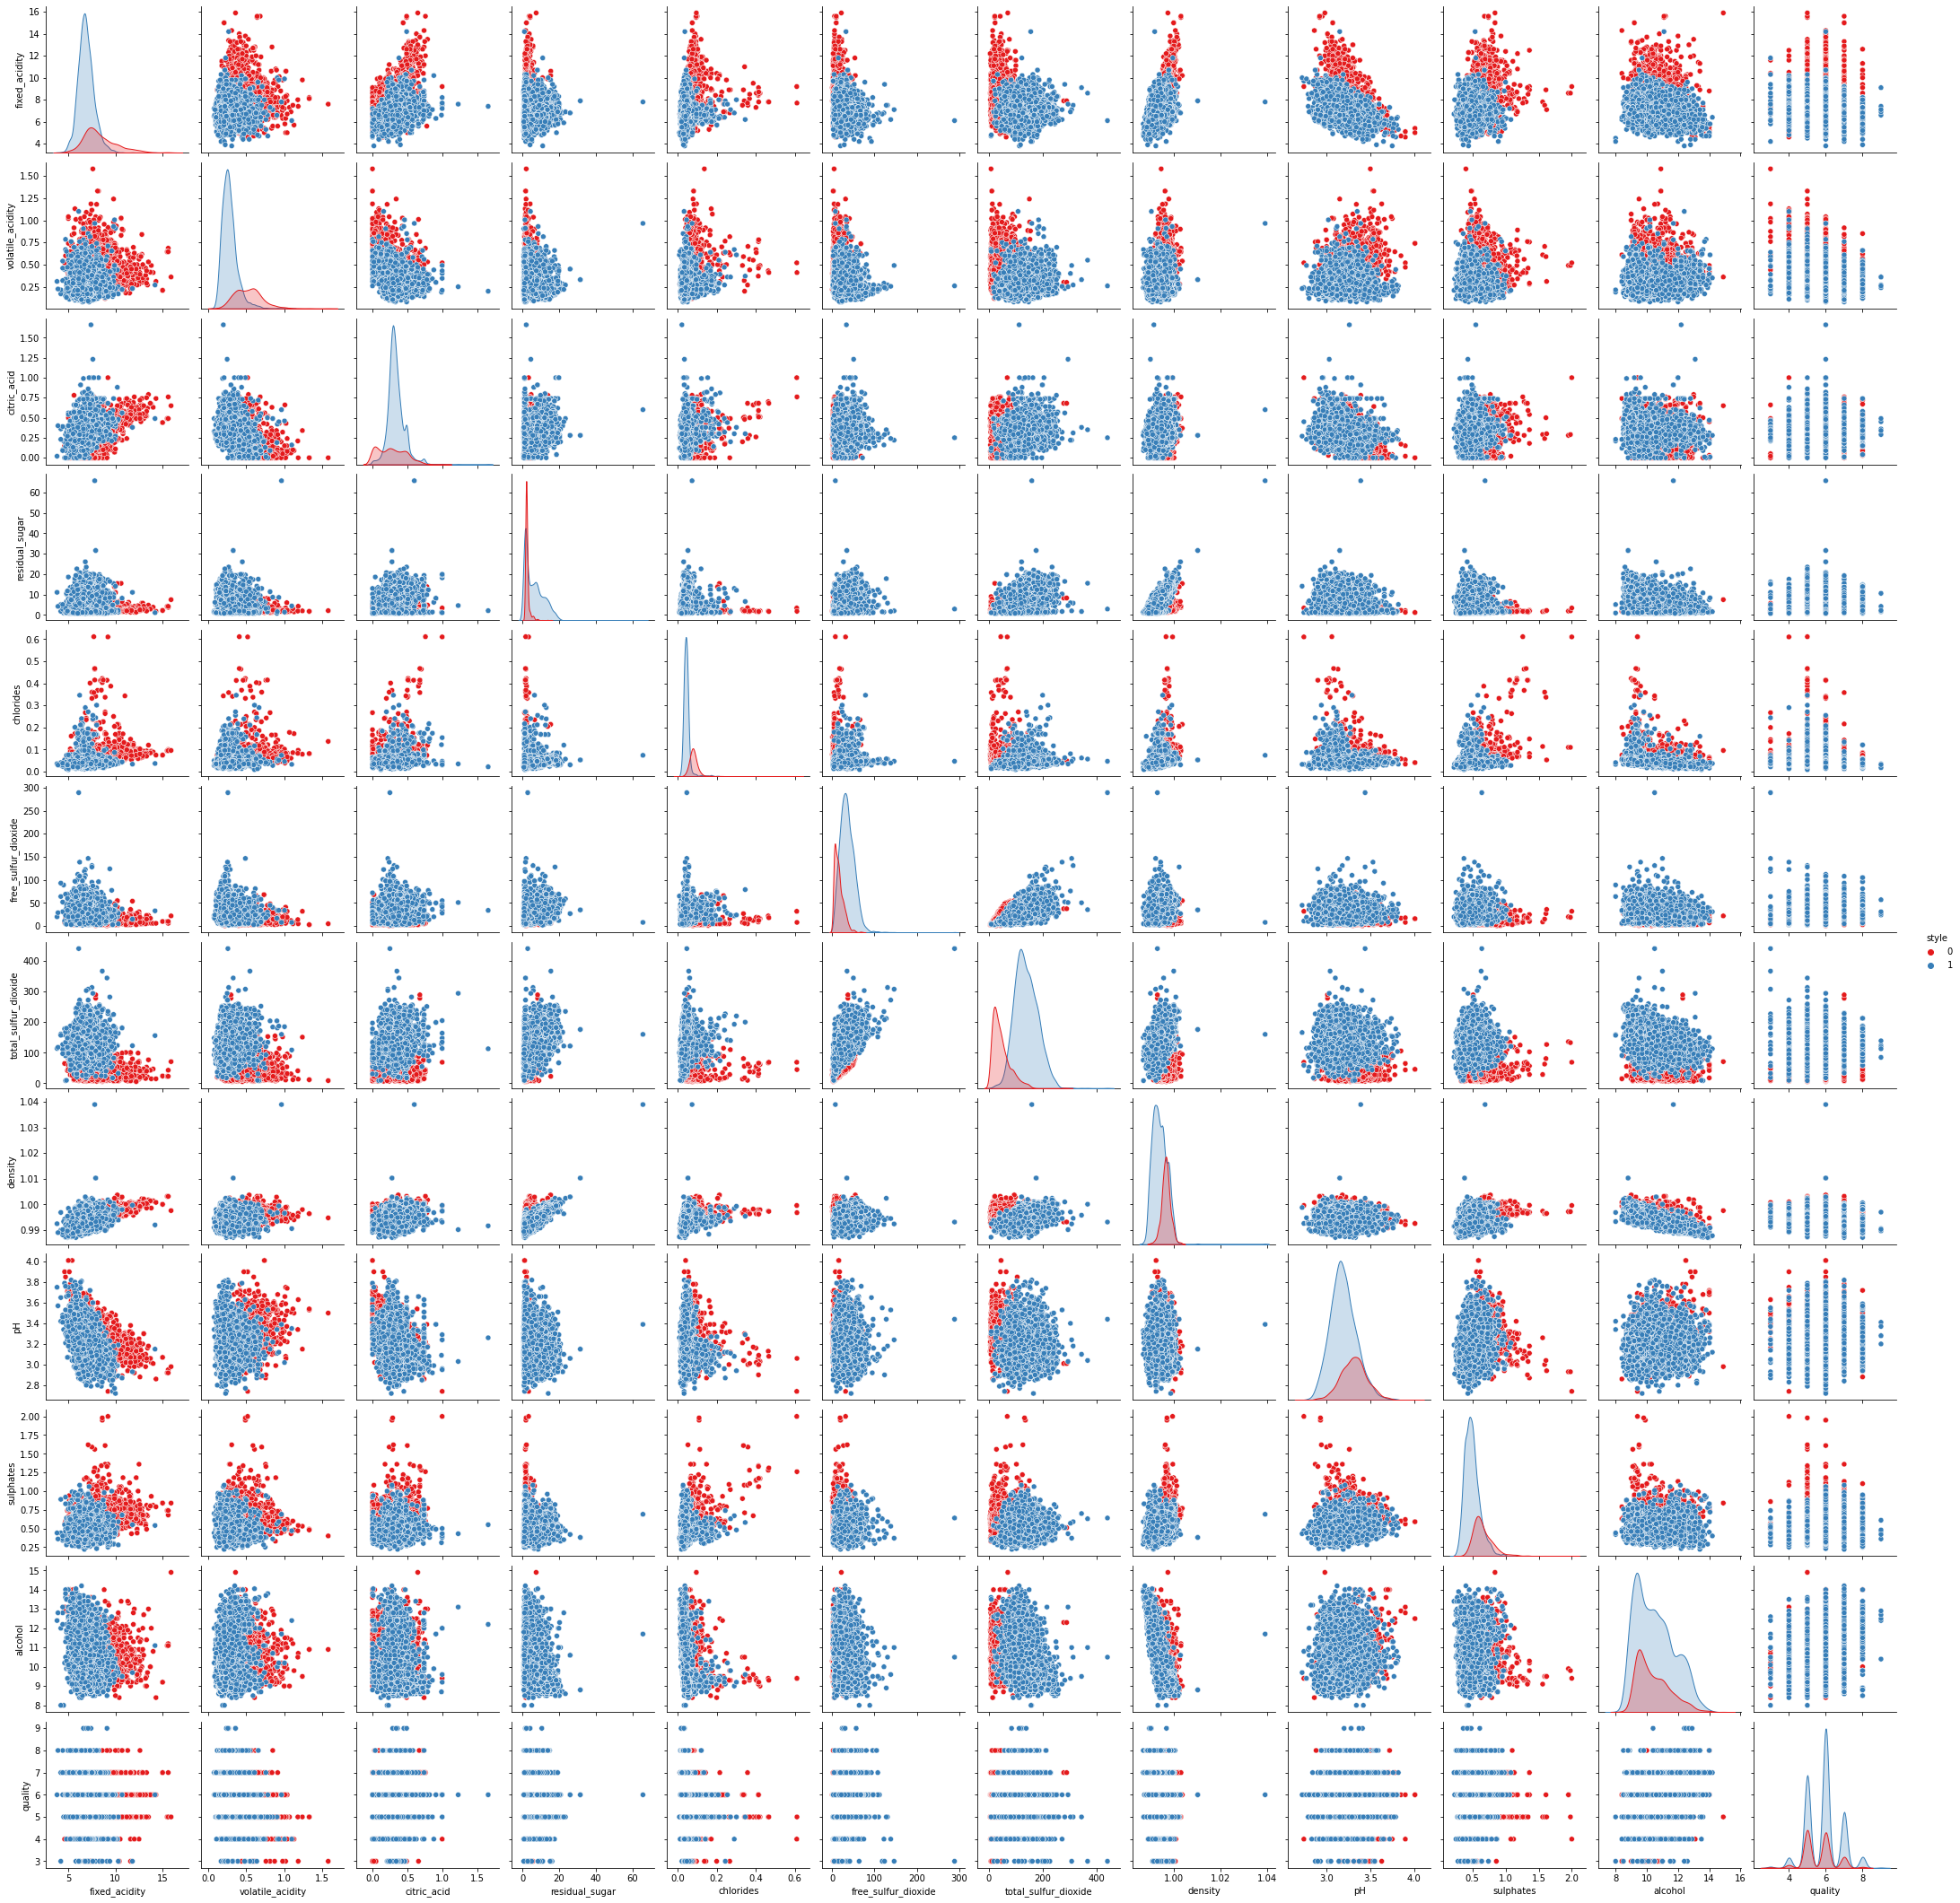

In [9]:
sns.pairplot(df,hue='style',palette='Set1')

In [10]:
y = df['style'] 
X = df.drop('style',axis='columns')

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#train test split and find best paramter

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [13]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }
    },  

    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [2,3,4,5,6,7,8,9],
            
        }
    }
    
}

In [14]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfpred = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfpred

,model,best_score,best_params
0,svm,0.995959,"{'C': 10, 'kernel': 'rbf'}"
1,KNeighborsClassifier,0.993650,{'n_neighbors': 5}


#svm

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(C = 10)
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
svm_acc = accuracy_score(y_test, predictions)
print("Accuracy svm : ",svm_acc)

Accuracy svm :  0.9961538461538462


#knn

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, pred)
print("Accuracy knn : ",knn_acc)

Accuracy knn :  0.9907692307692307
